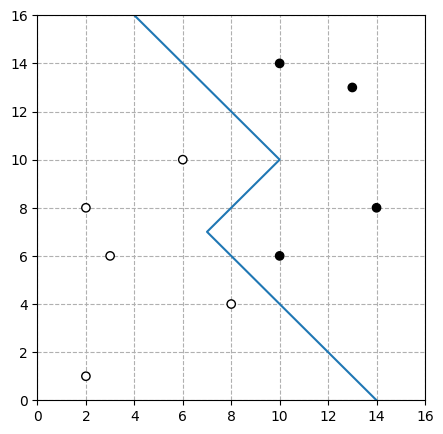

In [9]:
# Exercise 3

import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
d = pd.DataFrame({
    'X1': [2, 2, 3, 6, 8, 10, 10, 13, 14],
    'X2': [1, 8, 6, 10, 4, 6, 14, 13, 8],
    'Y': [0, 0, 0, 0, 0, 1, 1, 1, 1]
})
X, Y = d[['X1', 'X2']], d['Y']

# Correct this line
boundary=pd.DataFrame([(4,16),(10,10),(7,7),(14,0)], columns=['x','y'])

import matplotlib.pyplot as plt
c= ['white' if l == 0 else 'black' for l in Y]
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_axisbelow(True)
plt.scatter(X['X1'], X['X2'], color=c, edgecolor='k')
plt.xlim(0, 16)
plt.ylim(0, 16)
plt.plot(boundary['x'],boundary['y'])
plt.grid(linestyle='dashed')
plt.show()

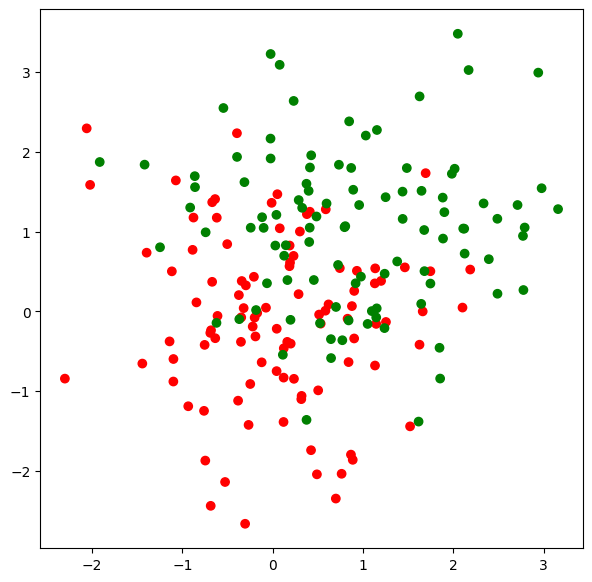

In [4]:
# Exercise 4
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x_red = norm.rvs(0, 1, 100, random_state=1)
y_red = norm.rvs(0, 1, 100, random_state=2)
x_green = norm.rvs(1, 1, 100, random_state=3)
y_green = norm.rvs(1, 1, 100, random_state=4)
d = pd.DataFrame({
    'X1': np.concatenate([x_red,x_green]),
    'X2': np.concatenate([y_red,y_green]),
    'Y': [1]*100+[0]*100
})
X, Y = d[['X1', 'X2']], d['Y']
# a)
c= ['green' if l == 0 else 'red' for l in Y]
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(X['X1'], X['X2'], color=c)
plt.show()

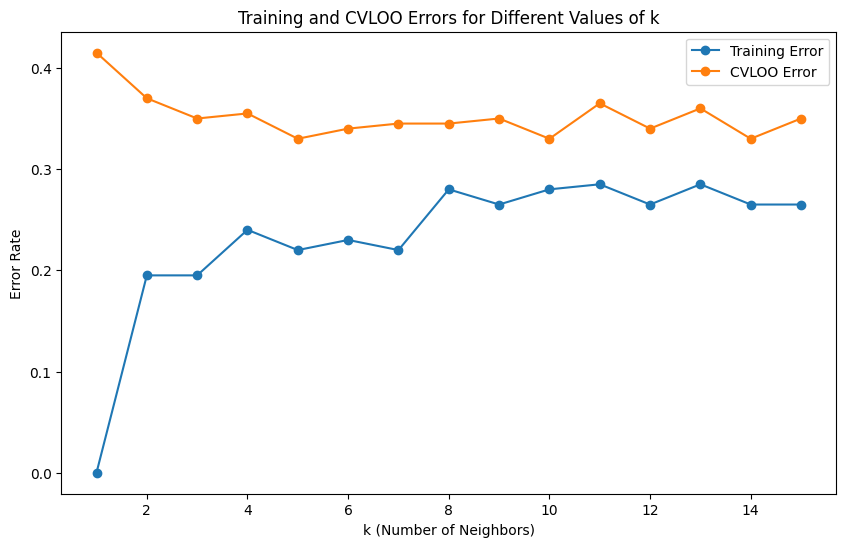

The best k would be 5


In [12]:
# b)
from sklearn.model_selection import LeaveOneOut, cross_val_score
from statistics import mean
loo = LeaveOneOut()
k_values = range(1, 16)
rangee = range(0, 16)
cvloo_errors = []
train_errors = []
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, Y)
    CVLOO_score = cross_val_score(knn, X, Y, cv=loo)
    train_score = knn.score(X, Y)
    cvloo_errors.append(1 - mean(CVLOO_score))
    train_errors.append(1 - train_score)
                        
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, marker='o', label='Training Error')
plt.plot(k_values, cvloo_errors, marker='o', label='CVLOO Error')
plt.title('Training and CVLOO Errors for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

# c)
print("The best k would be 5")